# Import Liabrarys

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Our Dataset

In [3]:
df = pd.read_csv("C:\\Users\\satyam_07\\Downloads\\Life Expectancy Data.csv")

In [4]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [5]:
df.shape

(2938, 22)

# See Columns Of This Dataset

In [6]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

# Column names me spaces issue hai

In [7]:
df.columns = df.columns.str.strip()

# Ye column kaam ka nhi tha 

### >> Percentage expenditure           GDP se correlated               drop
### >> Measles                          Extreme outliers                drop
### >> Under-five deathsinfant          deaths se duplicate             drop

#### >>>  Redundant + noisy columns model ko confuse karte hain

In [8]:
df.drop(["under-five deaths",
         "Country",
         "Measles", 
         "percentage expenditure", 
         "thinness  1-19 years", 
         "thinness 5-9 years"], 
        axis=1, 
        inplace=True)

# find information about data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Status                           2938 non-null   object 
 2   Life expectancy                  2928 non-null   float64
 3   Adult Mortality                  2928 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   Hepatitis B                      2385 non-null   float64
 7   BMI                              2904 non-null   float64
 8   Polio                            2919 non-null   float64
 9   Total expenditure                2712 non-null   float64
 10  Diphtheria                       2919 non-null   float64
 11  HIV/AIDS                         2938 non-null   float64
 12  GDP                 

# Find null values

In [10]:
df.isnull().sum()

Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
Hepatitis B                        553
BMI                                 34
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
Income composition of resources    167
Schooling                          163
dtype: int64

In [11]:
# Numeric health indicators → median
df.fillna(df['Life expectancy'].median(), inplace=True)
df.fillna(df['Adult Mortality'].median(), inplace=True)
df.fillna(df['BMI'].median(), inplace=True)

# Vaccination coverage → median (per column)
df.fillna(df['Hepatitis B'].median(), inplace=True)
df.fillna(df['Polio'].median(), inplace=True)
df.fillna(df['Diphtheria'].median(), inplace=True)

# Socio-economic indicators → median
df.fillna(df['Alcohol'].median(), inplace=True)
df.fillna(df['Total expenditure'].median(), inplace=True)

df.fillna(df['Income composition of resources'].median(), inplace=True)
df['Schooling'].fillna(df['Schooling'].mode()[0], inplace=True)


# Demographics → forward fill (time-series continuity)
# Backward fill
df['Population'] = df['Population'].bfill()

# Forward fill
df['GDP'] = df['GDP'].ffill()

C:\Users\satyam_07\AppData\Local\Temp\ipykernel_19944\4106821715.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Schooling'].fillna(df['Schooling'].mode()[0], inplace=True)


In [12]:
from sklearn.preprocessing import StandardScaler
nr = StandardScaler()

In [13]:
 df[["Life expectancy","Adult Mortality","infant deaths","Alcohol","Hepatitis B","BMI","Polio","Total expenditure","Diphtheria","HIV/AIDS","GDP","Population","Income composition of resources","Schooling"]] = nr.fit_transform(df[["Life expectancy","Adult Mortality","infant deaths","Alcohol","Hepatitis B","BMI","Polio","Total expenditure","Diphtheria","HIV/AIDS","GDP","Population","Income composition of resources","Schooling"]])

In [14]:
df

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Income composition of resources,Schooling
0,2015,Developing,-0.445408,0.793379,0.268824,-0.525744,-0.624904,-0.968541,-3.273637,-0.161165,-0.729716,-0.323445,-0.430444,0.440444,-0.254451,-0.369667
1,2014,Developing,-0.981827,0.857803,0.285786,-0.525744,-0.756219,-0.993234,-1.047914,-0.160041,-0.856564,-0.323445,-0.428322,-0.177477,-0.254632,-0.376738
2,2013,Developing,-0.981827,0.833644,0.302749,-0.525744,-0.668676,-1.017926,-0.876704,-0.162851,-0.771999,-0.323445,-0.426901,0.403364,-0.254994,-0.383810
3,2012,Developing,-1.023899,0.865856,0.328193,-0.525744,-0.537361,-1.042618,-0.662692,-0.140932,-0.645150,-0.323445,-0.424049,-0.115158,-0.255417,-0.390881
4,2011,Developing,-1.055453,0.890015,0.345155,-0.525744,-0.493589,-1.062372,-0.619890,-0.177464,-0.602867,-0.323445,-0.469298,-0.128445,-0.255961,-0.412096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,Developing,-2.622638,4.497780,-0.028022,-0.273032,-0.493589,-0.573463,-0.662692,-0.219054,-0.729716,6.275044,-0.440136,0.052793,-0.258801,-0.433310
2934,2003,Developing,-2.601602,4.433356,-0.036503,-0.290461,-3.163656,-0.593217,-3.230835,-0.253338,-0.602867,6.885650,-0.440212,0.050137,-0.258136,-0.412096
2935,2002,Developing,-2.570047,-0.736700,-0.044984,-0.268966,-0.274731,-0.612971,-0.405878,-0.252776,-0.476019,7.496256,-0.469760,-0.181214,-0.257593,-0.376738
2936,2001,Developing,-2.517457,4.199818,-0.044984,-0.426402,-0.143417,-0.632725,-0.277471,-0.273571,-0.306887,7.949287,-0.433105,0.045185,-0.257593,-0.390881


In [15]:
df.isnull().sum()

Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
Hepatitis B                        0
BMI                                0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Income composition of resources    0
Schooling                          0
dtype: int64

# Feature enginearing

### 1.  >> Adult Mortality + infant deaths + HIV/AIDS    =       HealthRisk score

In [16]:
df["HealthRisk"] = (
    df["Adult Mortality"] +
    df["infant deaths"] +
    df["HIV/AIDS"]
)


# Polio + Diphtheria + Hepatitis B      =     ImmunizationScore

In [17]:
df["ImmunizationScore"] = (
    df["Polio"] + df["Diphtheria"] + df["Hepatitis B"]
) / 3


# Schooling + Income composition    =      SocioEcoScore

In [18]:
df["SocioEcoScore"] = (
    df["Schooling"] +
    df["Income composition of resources"]
)


# Population   =     Highly skewed     =       log transform

In [19]:
df["Population"] = np.log1p(df["Population"])


In [20]:
df

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,Hepatitis B,BMI,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,Income composition of resources,Schooling,HealthRisk,ImmunizationScore,SocioEcoScore
0,2015,Developing,-0.445408,0.793379,0.268824,-0.525744,-0.624904,-0.968541,-3.273637,-0.161165,-0.729716,-0.323445,-0.430444,0.364951,-0.254451,-0.369667,0.738758,-1.542752,-0.624117
1,2014,Developing,-0.981827,0.857803,0.285786,-0.525744,-0.756219,-0.993234,-1.047914,-0.160041,-0.856564,-0.323445,-0.428322,-0.195379,-0.254632,-0.376738,0.820145,-0.886899,-0.631370
2,2013,Developing,-0.981827,0.833644,0.302749,-0.525744,-0.668676,-1.017926,-0.876704,-0.162851,-0.771999,-0.323445,-0.426901,0.338872,-0.254994,-0.383810,0.812948,-0.772460,-0.638804
3,2012,Developing,-1.023899,0.865856,0.328193,-0.525744,-0.537361,-1.042618,-0.662692,-0.140932,-0.645150,-0.323445,-0.424049,-0.122346,-0.255417,-0.390881,0.870604,-0.615068,-0.646298
4,2011,Developing,-1.055453,0.890015,0.345155,-0.525744,-0.493589,-1.062372,-0.619890,-0.177464,-0.602867,-0.323445,-0.469298,-0.137476,-0.255961,-0.412096,0.911726,-0.572116,-0.668057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,Developing,-2.622638,4.497780,-0.028022,-0.273032,-0.493589,-0.573463,-0.662692,-0.219054,-0.729716,6.275044,-0.440136,0.051447,-0.258801,-0.433310,10.744802,-0.628666,-0.692111
2934,2003,Developing,-2.601602,4.433356,-0.036503,-0.290461,-3.163656,-0.593217,-3.230835,-0.253338,-0.602867,6.885650,-0.440212,0.048920,-0.258136,-0.412096,11.282503,-2.332453,-0.670232
2935,2002,Developing,-2.570047,-0.736700,-0.044984,-0.268966,-0.274731,-0.612971,-0.405878,-0.252776,-0.476019,7.496256,-0.469760,-0.199933,-0.257593,-0.376738,6.714572,-0.385543,-0.634331
2936,2001,Developing,-2.517457,4.199818,-0.044984,-0.426402,-0.143417,-0.632725,-0.277471,-0.273571,-0.306887,7.949287,-0.433105,0.044194,-0.257593,-0.390881,12.104120,-0.242592,-0.648474


# Correlation Analysis (Target ke saath)

In [21]:
corr = df[["Life expectancy",
           "Adult Mortality","infant deaths","Alcohol","Hepatitis B","BMI","Polio",
           "Total expenditure","Diphtheria","HIV/AIDS","GDP","Population",
           "Income composition of resources","Schooling","HealthRisk",
           "ImmunizationScore","SocioEcoScore"]].corr()["Life expectancy"].sort_values(ascending=False)

print(corr)

Life expectancy                    1.000000
BMI                                0.530047
Diphtheria                         0.477829
ImmunizationScore                  0.465843
Polio                              0.464060
GDP                                0.428596
Hepatitis B                        0.225048
Schooling                          0.113449
Alcohol                            0.110525
SocioEcoScore                      0.036130
Total expenditure                  0.027768
Income composition of resources   -0.041909
Population                        -0.046276
infant deaths                     -0.196769
HIV/AIDS                          -0.556703
Adult Mortality                   -0.696359
HealthRisk                        -0.702675
Name: Life expectancy, dtype: float64


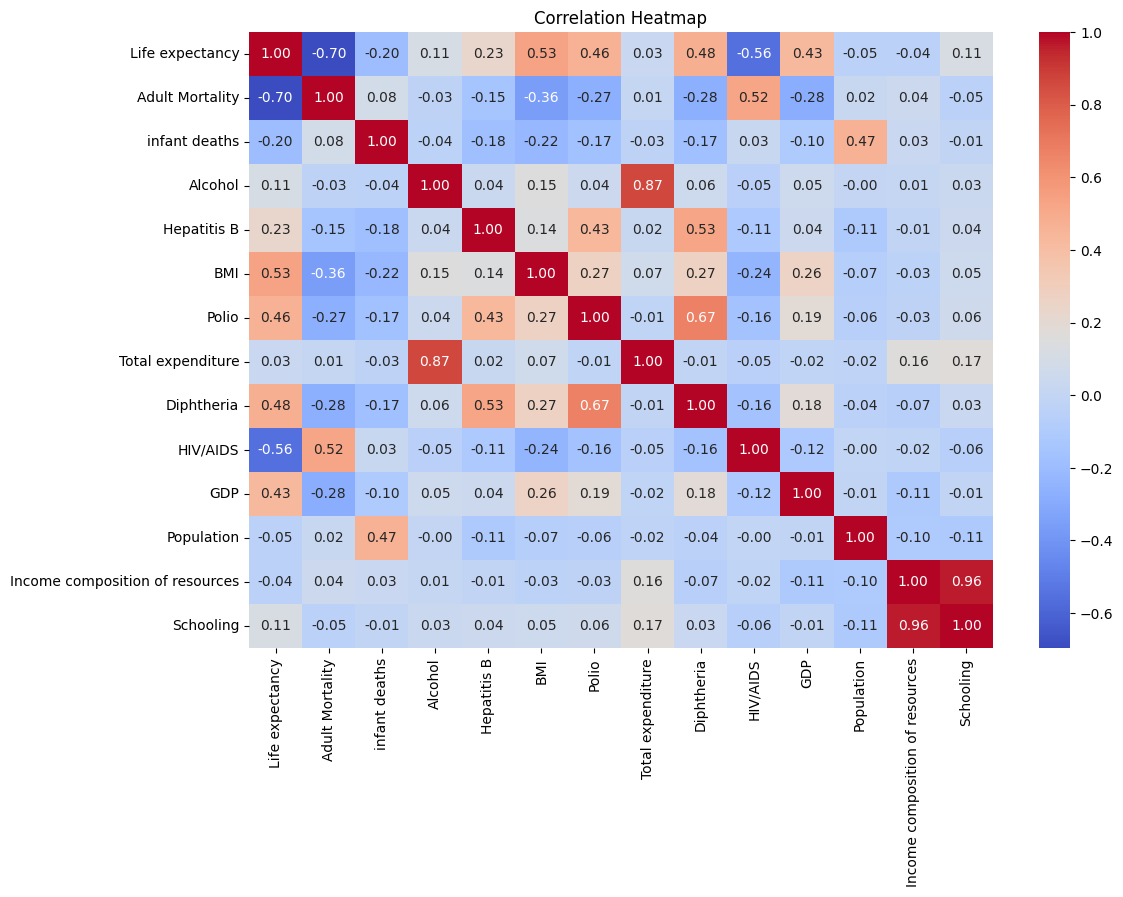

In [22]:
corr_matrix = df[["Life expectancy","Adult Mortality","infant deaths","Alcohol","Hepatitis B","BMI","Polio",
                  "Total expenditure","Diphtheria","HIV/AIDS","GDP","Population",
                  "Income composition of resources","Schooling"]].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [23]:
X = df[["Adult Mortality","infant deaths","Alcohol","Hepatitis B","BMI","Polio",
                  "Total expenditure","Diphtheria","HIV/AIDS","GDP","Population",
                  "Income composition of resources","Schooling"]]

In [24]:
Y = df[["Life expectancy"]]

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)


# Sare model ko ek sath import kr skte he


In [34]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error

# Lasso = (accuracy = 75.07 %)

In [35]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

,alpha,0.01
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [36]:
y_pred = lasso.predict(X_test)
print("Lasso R2:", r2_score(y_test, y_pred))

Lasso R2: 0.7507926515392073


# Ridge = (Accuracy = 72.76%)

In [37]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_test)

print("Ridge R2:", r2_score(y_test, y_pred))

Ridge R2: 0.727640949183858


# ElasticNet = (Accuracy = 74.99%)

In [38]:
elastic = ElasticNet(alpha=0.01, l1_ratio=0.5)
elastic.fit(X_train, y_train)

y_pred_elastic = elastic.predict(X_test)

print("ElasticNet R2:", r2_score(y_test, y_pred_elastic))

ElasticNet R2: 0.7499893798855926


# Linearregression = (Accuracy = 72.58)

In [39]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("linearRegression R2:", r2_score(y_test, y_pred))

linearRegression R2: 0.7258232398190498


# Conclusion :- we are used all models of LInear models like Linearregrsion(),ridge(),elasticNET(),Lasso() and the lasso model is very accurate answer of this dataset and project